<a href="https://colab.research.google.com/github/Aisha1820/ASSESSMENT_NatWest-Group/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NatWest Group**

**Data Science internship**

Q1. Case study: Login on kaggle, find out cubic_zirconia.csv 

Data set: https://www.kaggle.com/nabanic/diamond-price-prediction-linear-regression

**Data set: /kaggle/input/gemstone-price-prediction/cubic_zirconia.csv**

Data dictionary: /kaggle/input/gemstone-price-prediction/data dictionary.xlsx

**Problem 1: Perform Explanatory Data Analysis,& Uni-variate &Multi-variate analysis.**

**AUTHOR:AYESHA SHAHANAZ**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset
df=pd.read_csv('/content/sample_data/cubic_zirconia.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
#Exploring data
df.shape

(26967, 11)

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [9]:
df.nunique()

Unnamed: 0    26967
carat           257
cut               5
color             7
clarity           8
depth           169
table           112
x               531
y               526
z               356
price          8742
dtype: int64

In [10]:
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
Unnamed: 0,0.00,int64,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,0.00,float64,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,0.00,float64,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,0.00,float64,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,0.00,float64,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


In [12]:
#EDA
#Missing Values
df['depth'].fillna(df['depth'].mean(), inplace=True)
print(f'before removing duplicates{df.shape}')

before removing duplicates(26967, 11)


In [13]:
df.drop_duplicates(inplace=True)
print(f'after removing duplicates{df.shape}')

after removing duplicates(26967, 11)


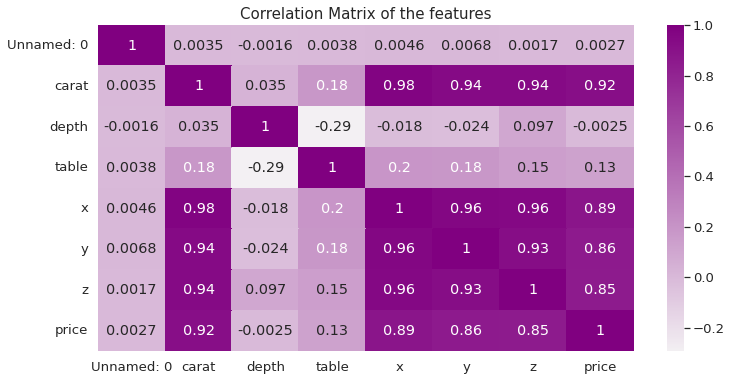

In [20]:
corr_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
cmap = sns.light_palette("Purple",as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,annot=True)
plt.title("Correlation Matrix of the features",fontsize=15)
plt.show()

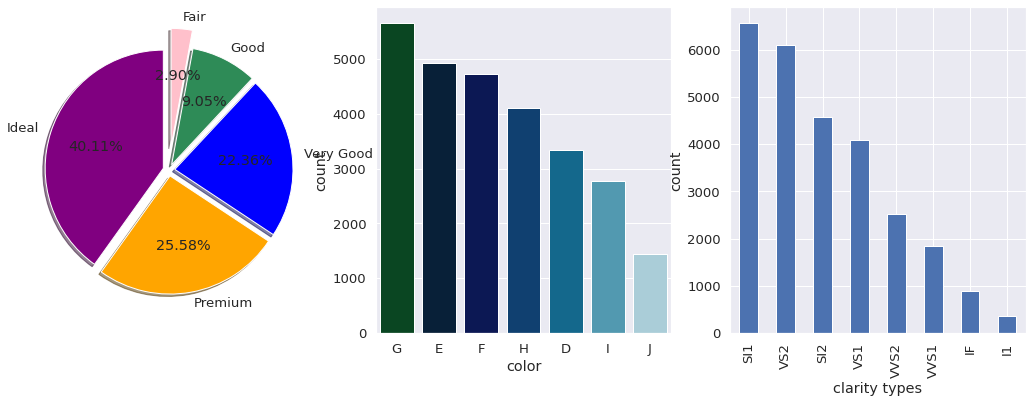

In [36]:
#UNIVARIANT ANALYSIS

plt.rcParams['figure.figsize']=18,6

plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['Purple', 'Orange', 'Blue', 'Seagreen', 'Pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')

plt.show()

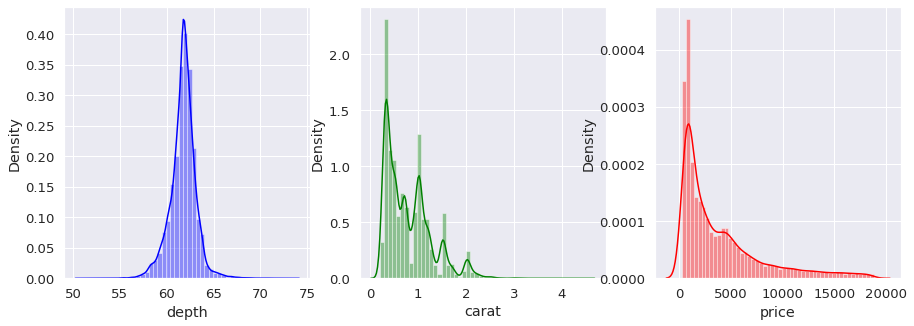

In [37]:
plt.rcParams['figure.figsize']=15,5

plt.subplot(131)
sns.distplot(df['depth'], color='Blue')

plt.subplot(132)
sns.distplot(df['carat'], color='Green')

plt.subplot(133)
sns.distplot(df['price'], color='Red')

plt.show()

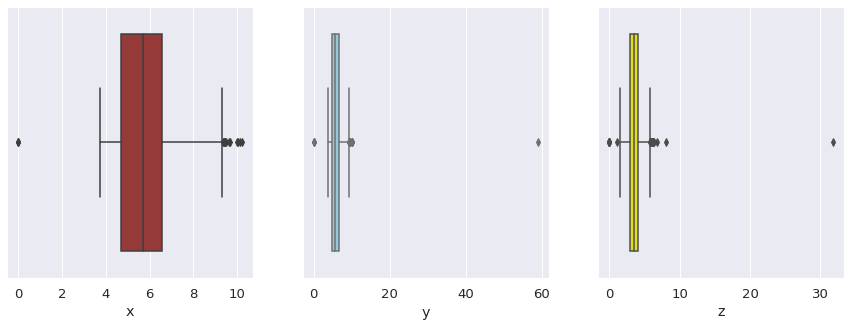

In [39]:
plt.rcParams['figure.figsize']=15,5

plt.subplot(131)
sns.boxplot(df['x'], color='Brown')

plt.subplot(132)
sns.boxplot(df['y'], color='SkyBlue')

plt.subplot(133)
sns.boxplot(df['z'], color='yellow')

plt.show()

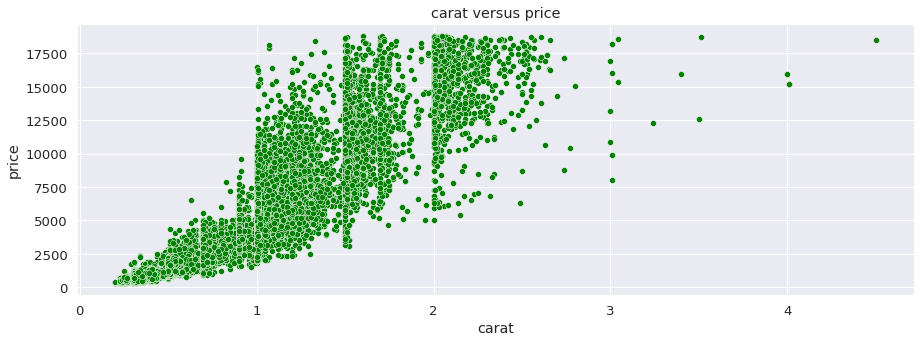

In [45]:
#BI-VARIANT ANALYSIS

sns.scatterplot(df['carat'], df['price'], color='Green')
plt.title('carat versus price')
plt.show()

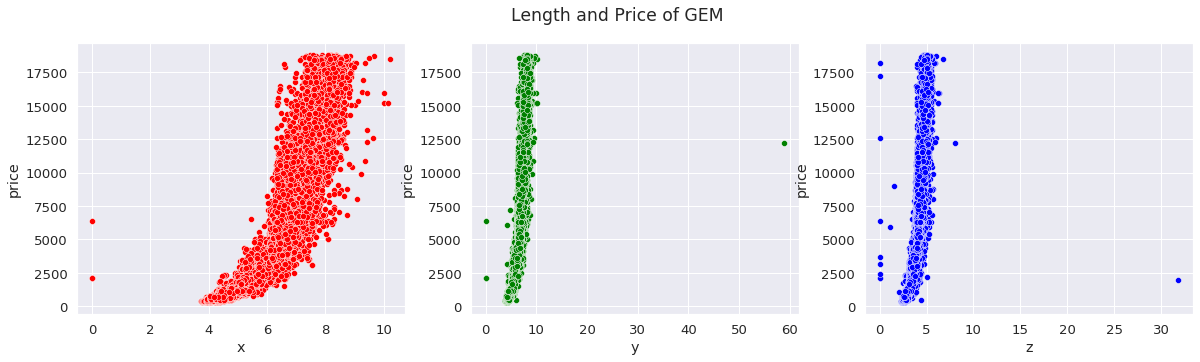

In [47]:
plt.rcParams['figure.figsize']=20,5

plt.subplot(131)
sns.scatterplot(df['x'], df['price'], color='Red')

plt.subplot(132)
sns.scatterplot(df['y'], df['price'], color='green')

plt.subplot(133)
sns.scatterplot(df['z'], df['price'], color='blue')

plt.suptitle('Length and Price of GEM')
plt.show()

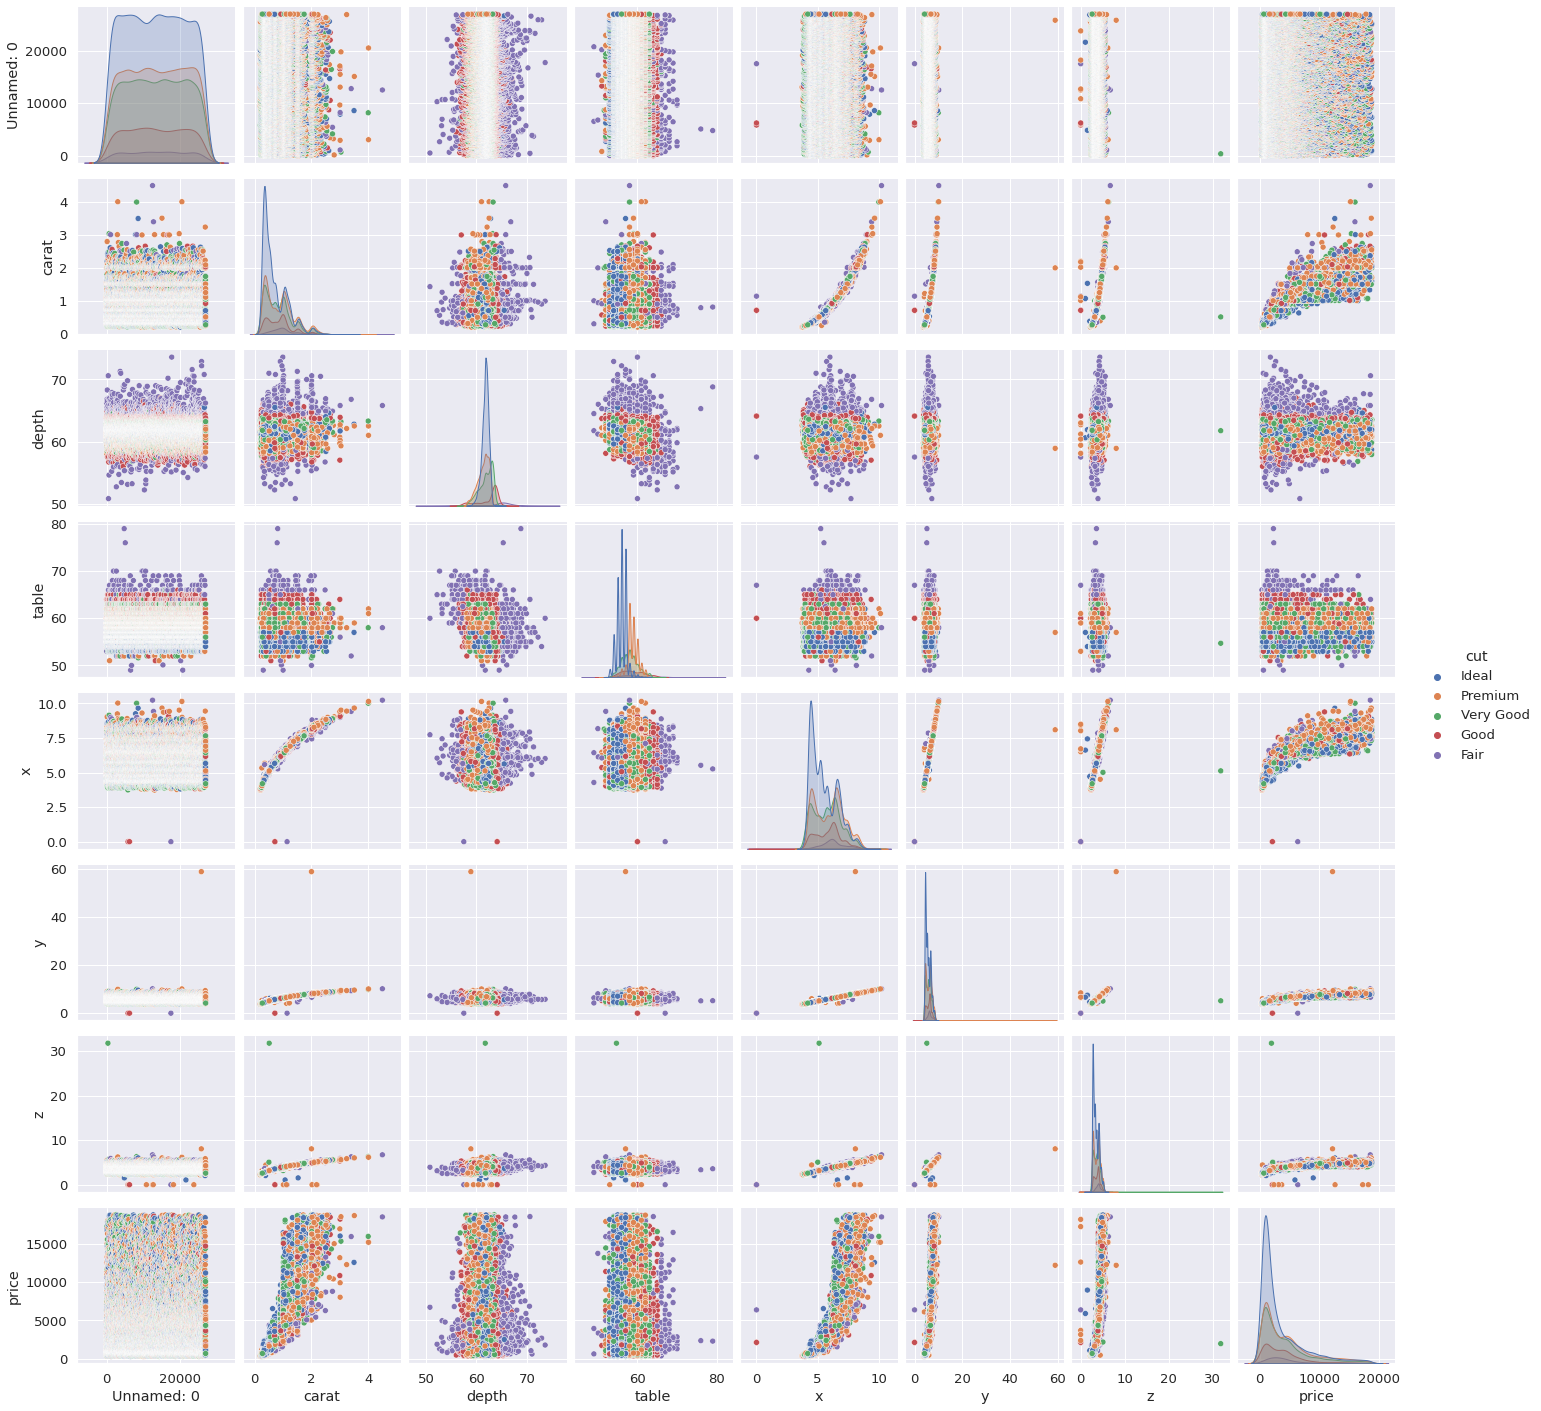

In [48]:
#MULTI-VARIANT ANALYSIS

sns.pairplot(df, hue = 'cut')
plt.show()

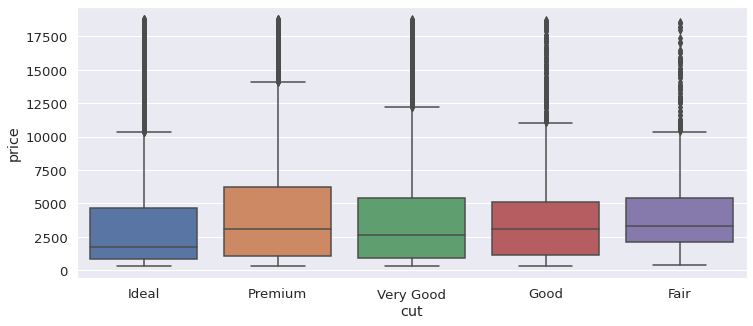

In [49]:
plt.figure(figsize = (12,5))
sns.boxplot(df['cut'], df['price'])
plt.show()

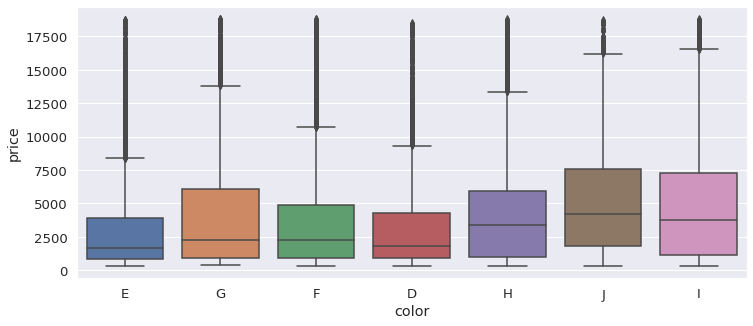

In [50]:
plt.figure(figsize = (12,5))
sns.boxplot(df['color'], df['price'])
plt.show()

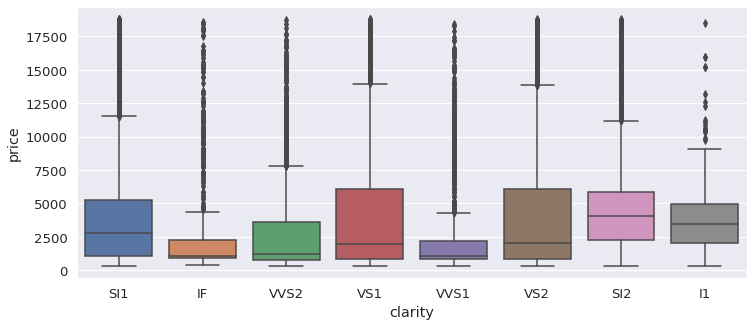

In [51]:
plt.figure(figsize = (12,5))
sns.boxplot(df['clarity'], df['price'])
plt.show()

In [52]:
df[['price','cut']].groupby(['cut']).agg(['min','mean','max']).style.background_gradient(cmap='summer')

In [53]:
df[['price','color']].groupby(['color']).agg(['min','mean','max']).style.background_gradient(cmap='winter')

In [54]:
df[['price','clarity']].groupby(['clarity']).agg(['min','mean','max']).style.background_gradient(cmap='cool')